In [4]:
%matplotlib inline

from ancestrator import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

smartpca


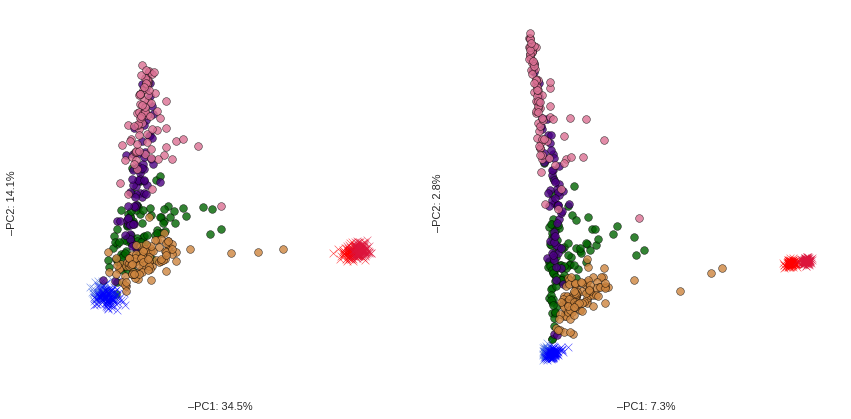

In [3]:
from itertools import product


sns.set_context('notebook')
sns.set_style('white')

panel_labels = ['GAL_Completo', 'CPx100']
samplegroup_labels = ['LEA']
source_labels = ['1000Genomes']
components = [['PC1', 'PC2']]
implementations = ['smartpca']

combos = list(product(source_labels, samplegroup_labels, panel_labels, components))


for implementation in implementations:
    print(implementation)
    
    plotw, ploth = 6, 6
    ncols, nrows = len(list(combos)), 1
    fig = plt.figure(figsize=(ncols * plotw, nrows * ploth))
    ax_ids = list(np.arange(ncols * nrows) + 1)
    
    for s, sg, p, components in combos:
        dataset = Dataset(s, sg, p)
        smartpca = dataset.pca(implementation=implementation)
        smartpca.plot(ax=fig.add_subplot(nrows, ncols, ax_ids.pop(0)), components_to_plot=components)
    
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

Saved at -> /home/juan/tesina/1000Genomes/plots/L.GAL_Affy.SmartPCA.png


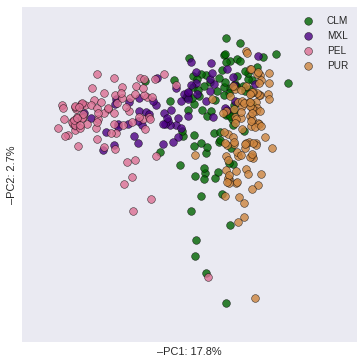

In [11]:
dataset = Dataset('1000Genomes', 'L', 'GAL_Affy')
pca = dataset.pca()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

pca.plot(ax, ['PC1', 'PC2'])
pca.savefig()